In [18]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import edhc_risk_kit as erk

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_o=100):
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps,n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    prices = s_o*(1+rets).cumprod()
    return prices

prices = gbm()
prices.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,98.640870,98.933301,101.599128,97.070024,92.069804,99.464654,98.825908,101.360691,98.954827,99.479795,...,103.819762,97.360487,94.754731,98.019918,97.198198,98.228358,98.774791,91.521795,101.665633,101.470763
1,93.453358,103.232077,109.266979,99.002592,92.114625,91.519210,99.469741,99.430576,99.928398,95.282981,...,99.365362,98.926789,93.588074,102.797640,94.728348,103.125662,105.591119,90.415217,104.520619,101.189675
2,97.319113,99.410522,108.513158,104.213641,97.060418,91.099939,99.612322,101.017346,96.178243,95.080100,...,91.327991,107.214472,84.171678,111.260146,102.517029,99.231972,113.772876,90.064166,106.163802,100.182751
3,95.901234,101.288866,105.407944,98.175909,100.876432,100.692018,101.443864,103.703054,100.082198,97.128892,...,87.151646,110.010661,83.742557,118.797106,105.631304,95.400009,123.438886,94.051221,102.848523,99.228771
4,103.938103,96.316760,100.820517,103.321649,98.444821,97.825125,102.585936,106.052185,93.357388,102.996328,...,86.579293,112.197946,84.329376,113.456974,100.452635,86.944199,125.102267,89.150289,103.107318,106.027923


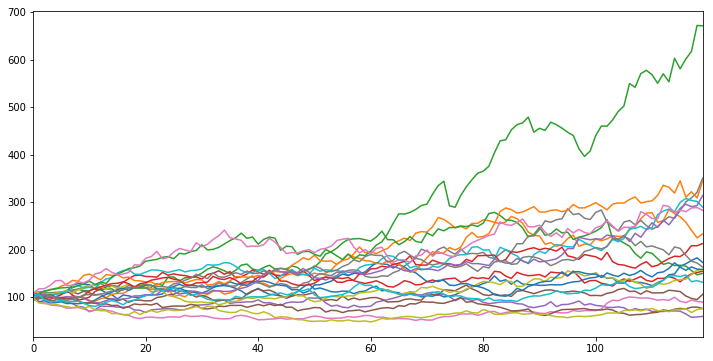

In [12]:
prices = gbm(n_years=10, n_scenarios=20)
prices.plot(figsize=(12,6),legend=False)

In [13]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_o=100):
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps,n_scenarios))
    rets_plus_one = np.random.normal(loc=(mu+1)**dt, scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    prices = s_o*pd.DataFrame(rets_plus_one).cumprod()
    return prices

prices = gbm()
prices.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,98.127084,102.365982,98.010801,105.028161,98.664161,96.906790,111.643603,98.725300,98.140377,95.225015,...,100.532959,99.823080,102.061771,96.257365,100.527801,97.350682,100.191746,99.296995,102.273478,101.106836
1,101.191008,99.788499,97.020446,104.051076,98.986719,97.378341,109.373539,99.076076,98.287560,95.242537,...,102.217815,97.070900,107.794187,99.915737,100.507398,96.714954,104.577782,100.259391,103.010555,99.484218
2,101.238333,100.497531,96.738776,106.235693,97.186788,95.847117,107.107365,107.364438,107.600820,97.987328,...,108.102946,96.318122,107.854633,98.186154,104.223646,102.887372,101.725197,109.105252,99.240062,106.705121
3,105.737590,97.609423,97.721349,100.369517,100.665881,97.757870,106.407346,100.773252,111.325796,102.413358,...,111.793318,102.169817,107.123551,101.346084,102.636984,103.570966,104.947957,106.692022,101.201307,105.328056
4,102.297705,94.279509,97.057764,105.206773,92.873225,95.626905,106.160460,97.281579,108.032304,99.168888,...,111.289741,104.220279,97.911222,95.845008,102.307173,95.081248,98.496130,104.038067,106.366263,110.974351


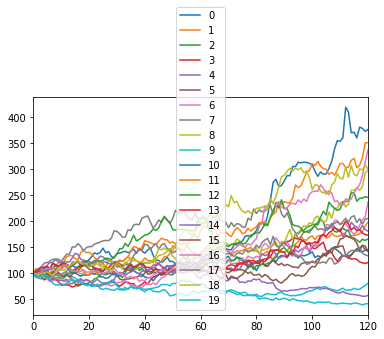

In [20]:
prices = erk.gbm(n_years=10, n_scenarios=20)
prices.plot()